In [14]:
# import
import os
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [15]:
# avoid info and warnings of tf
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [16]:
# helper function1 plot dataset
def plot_data(pl,X,y):
    # plot points where y==0
    pl.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
    # plot points where y==1
    pl.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
    pl.legend(['0','1'])
    return pl

In [17]:
# helper function2 plot the decision boundary learnt
def plot_decision_boundary(model, X,y):
    amin, bmin=X.min(axis=0)-0.1
    amax, bmax=X.max(axis=0)+0.1
    hticks=np.linspace(amin, amax,101)
    vticks=np.linspace(bmin, bmax,101)
    aa, bb=np.meshgrid(hticks,vticks)
    ab=np.c_[aa.ravel(),bb.ravel()]
    c=model.predict(ab)
    z=c.reshape(aa.shape)
    plt.Figure(figsize=(12,8))
    plt.contourf(aa,bb,z,cmp='bwr',aplha=0.2)
    plot_data(plt,X,y)
    return plt

In [18]:
X,y=make_circles(n_samples=1000,factor=0.6,noise=0.1,random_state=42)

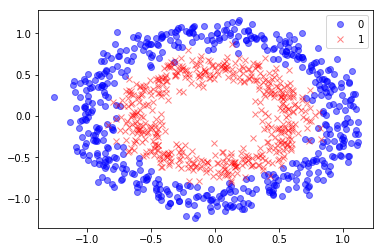

In [19]:
pl=plot_data(plt,X,y)
pl.show()

In [20]:
# lets split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from keras.optimizers import Adam

In [23]:
from keras.models import Model
from keras.layers import Input
# input layer
input_layer=Input(shape=(2,))
x=Dense(4,activation="tanh", name="hidden1")(input_layer)
x=Dense(4,activation="tanh", name="hidden2")(x)
# output layer
o=Dense(1,activation="sigmoid", name="output_layer")(x)
model=Model(inputs=input_layer,outputs=o)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 4)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [25]:
# step 3 compile model
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
from keras.utils import plot_model
plot_model(model,to_file="model.png", show_shapes=True, show_layer_names=True )

In [26]:
#lets define a call back
from keras.callbacks import EarlyStopping

#mycallback=[EarlyStopping(monitor='acc',patience=5,mode=max)]
mycallback=[EarlyStopping(monitor='val_acc',patience=5,mode=max)]

C:\Users\bharti\Anaconda3\lib\site-packages\keras\callbacks.py:502: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [27]:
# step 4 train model - fit
#model.fit(X_train,y_train,epochs=100,verbose=1, callbacks=mycallback)
model.fit(X_train,y_train,epochs=100,verbose=1, callbacks=mycallback, validation_data=(X_test,y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 643us/step - loss: 0.7009 - acc: 0.4829 - val_loss: 0.6959 - val_acc: 0.4800
Epoch 2/100
700/700 [==============================] - 0s 47us/step - loss: 0.6904 - acc: 0.5157 - val_loss: 0.6876 - val_acc: 0.4800
Epoch 3/100
700/700 [==============================] - 0s 50us/step - loss: 0.6369 - acc: 0.6343 - val_loss: 0.6091 - val_acc: 0.5767
Epoch 4/100
700/700 [==============================] - 0s 50us/step - loss: 0.4745 - acc: 0.8529 - val_loss: 0.4027 - val_acc: 0.8533
Epoch 5/100
700/700 [==============================] - 0s 51us/step - loss: 0.3024 - acc: 0.9329 - val_loss: 0.2725 - val_acc: 0.9500
Epoch 6/100
700/700 [==============================] - 0s 47us/step - loss: 0.1916 - acc: 0.9586 - val_loss: 0.2293 - val_acc: 0.9500
Epoch 7/100
700/700 [==============================] - 0s 51us/step - loss: 0.1512 - acc: 0.9571 - val_loss: 0.1934 - val_acc: 0.9267
Epoch 8/100
700

In [28]:
# step 5 evaluate model, run on test
eval_result=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 33us/step


In [29]:
print("test loss: ",eval_result[0],"  test accuracy : ",eval_result[1])

test loss:  0.16818719069163005   test accuracy :  0.9266666674613953


C:\Users\bharti\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'cmp', 'aplha'
  s)


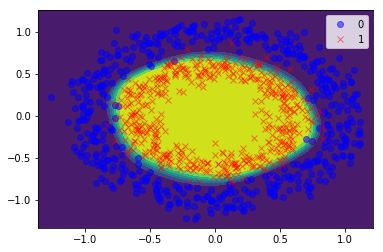

In [30]:
# plot decision boundary of model we learnt
plot_decision_boundary(model,X,y).show()